# Init

In [16]:
import os

path = os.getcwd()
# set the working directory
os.chdir('c:\\Github\\new-peak-project\\src')
print(f'Project path set to: {os.getcwd()}')

Project path set to: c:\Github\new-peak-project\src


In [17]:
from dotenv import dotenv_values
config = dotenv_values(".env")
print(config["DATA_PATH"])

I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\new-peak-project\experiments


In [18]:
new_path = config["NEW_DATA_PATH"]
print(f'New data path set to: {new_path}')

New data path set to: I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project


# Config

In [19]:
from models.utils.config_manager import initialise_config

initialise_config(folder_name="model-inspection", verbose=1)


Folder I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\model-inspection already exists. No changes made.


In [20]:
# or load existing config
from models.utils.config_manager import load_configs, print_config

loaded_config = load_configs(folder_name="model-inspection", config_suffix="testCaseD")
print_config(loaded_config)

notebook: 
  version: testCaseD
  name: model-inspection
  compatible_notebooks: ['model-inspection-1']
  desc: Monitor the behaviour of 1-regulation feedback system 

exp: 
  spec: 
    n_layers: 2
    n_cascades: 2
    n_regs: 0
    gen_seed: 42
    drug: 
      name: D
      start: 500
      dose: 500
      regulations: [['R1', 'down'], ['R2', 'down']]
  parameter_generation: 
    ic_range: [200, 1000]
    param_range: [0.5, 1.5]
    param_mul_range: [0.99, 1.01]
  simulation: 
    start: 0
    stop: 1000
    step: 100


# Run

In [21]:
from models.Specs.ModelSpec3 import ModelSpec3

notebook_config = loaded_config["notebook"]
exp_config = loaded_config["exp"]
spec_config = exp_config['spec']
n_layers = spec_config['n_layers']
new_spec = ModelSpec3(num_intermediate_layers=n_layers)


In [22]:
import logging
from models.Specs.Drug import Drug
logging.basicConfig(level=logging.INFO)


drug_config = spec_config['drug']
drug_name = drug_config['name']
drug_start = drug_config['start']
drug_dose = drug_config['dose']
drug_regulations = drug_config['regulations']

new_drug = Drug(name=drug_name, start_time=drug_start, default_value=drug_dose)
for regs in drug_regulations:
    target, type = regs[0], regs[1]
    new_drug.add_regulation(target, type)

n_cascades = spec_config['n_cascades']
n_regs = spec_config['n_regs']
seed = spec_config['gen_seed']    
    
new_spec.generate_specifications(n_cascades, n_regs, seed)
new_spec.add_drug(new_drug)

In [23]:
param_gen_config = exp_config['parameter_generation']
specie_range = param_gen_config['ic_range']
param_range = param_gen_config['param_range']
param_mul_range = param_gen_config['param_mul_range']
builder = new_spec.generate_network('test', specie_range, param_range, param_mul_range, seed)

INFO:models.Specs.ModelSpec3:Generated model test with 14 reactions.
INFO:models.Specs.ModelSpec3:Model States: 14
INFO:models.Specs.ModelSpec3:Model Parameters: 36
INFO:models.Specs.ModelSpec3:Model Reactions: 14


In [24]:
print(builder.get_antimony_model())

model test

J0: R1a -> R1; (J0_Vmax+D*J0_Kw0)*R1a/(J0_Km + R1a)
J1: R1 -> R1a; J1_Vmax*R1/(J1_Km + R1)
J2: R2a -> R2; (J2_Vmax+D*J2_Kw0)*R2a/(J2_Km + R2a)
J3: R2 -> R2a; J3_Vmax*R2/(J3_Km + R2)
J4: I1_1a -> I1_1; J4_Vmax*I1_1a/(J4_Km + I1_1a)
J5: I1_1 -> I1_1a; (J5_Vmax+R1a*J5_Kw0)*I1_1/(J5_Km + I1_1)
J6: I1_2a -> I1_2; J6_Vmax*I1_2a/(J6_Km + I1_2a)
J7: I1_2 -> I1_2a; (J7_Vmax+R2a*J7_Kw0)*I1_2/(J7_Km + I1_2)
J8: I2_1a -> I2_1; J8_Vmax*I2_1a/(J8_Km + I2_1a)
J9: I2_1 -> I2_1a; (J9_Vmax+I1_1a*J9_Kw0)*I2_1/(J9_Km + I2_1)
J10: I2_2a -> I2_2; J10_Vmax*I2_2a/(J10_Km + I2_2a)
J11: I2_2 -> I2_2a; (J11_Vmax+I1_2a*J11_Kw0)*I2_2/(J11_Km + I2_2)
J12: Oa -> O; J12_Vmax*Oa/(J12_Km + Oa)
J13: O -> Oa; (J13_Vmax+I2_1a*J13_Kw0+I2_2a*J13_Kw1)*O/(J13_Km + O)

# State variables in the system
R1a=0
R1=361
R2a=0
R2=275
I1_1a=0
I1_1=598
I1_2a=0
I1_2=235
I2_1a=0
I2_1=391
I2_2a=0
I2_2=745
Oa=0
O=421

# Parameters in the system
J0_Km=148.33292232598907
J0_Vmax=1.276498909624252
J0_Kw0=0.09479301030772137
J1_Km=1

In [25]:
from models.Solver.RoadrunnerSolver import RoadrunnerSolver
from models.utils.config_manager import save_data
sim_config = exp_config['simulation']
sim_start = sim_config['start']
sim_stop = sim_config['stop']
sim_step = sim_config['step']
solver = RoadrunnerSolver()
solver.compile(builder.get_sbml_model())
res = solver.simulate(sim_start, sim_stop, sim_step)

save_data(notebook_config, res, "simulation_data")

save_data(notebook_config, res, "simulation_data", "csv", verbose=1)

Figure saved at I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\model-inspection\figures\testCaseD_simulation_plot.png


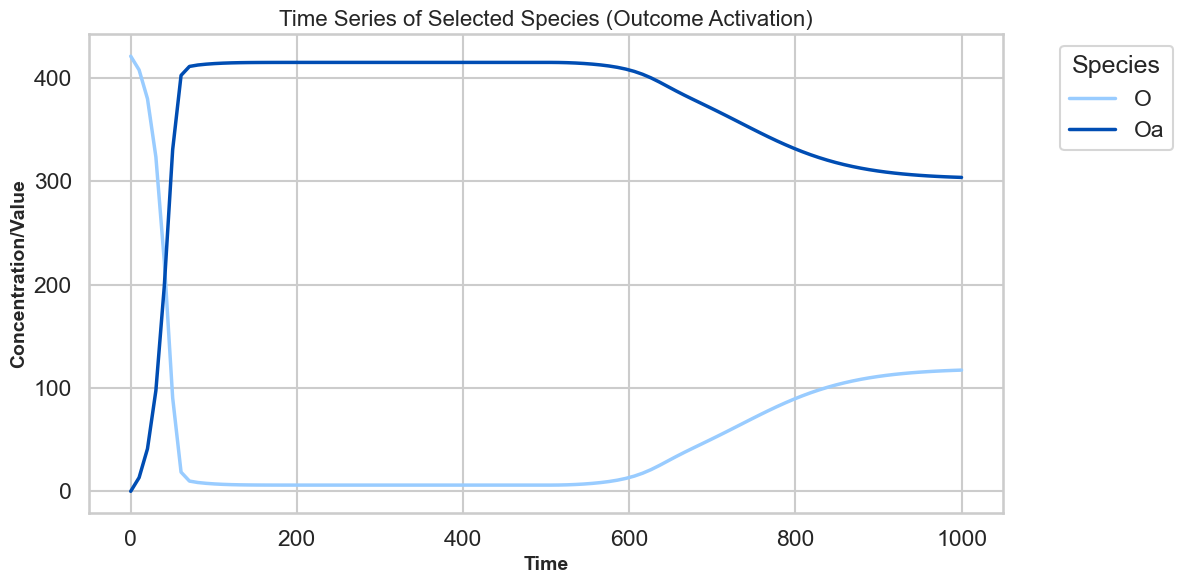

In [26]:
from visual.simulation import visualise_simulation
from models.utils.config_manager import save_figure

figure = visualise_simulation(res, activated_only=True, outcome_activation=True, show_legend=True)
save_figure(notebook_config, figure, "simulation_plot", "png", verbose=1, dpi=300)

Figure saved at I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\model-inspection\figures\testCaseD_network_topology.png


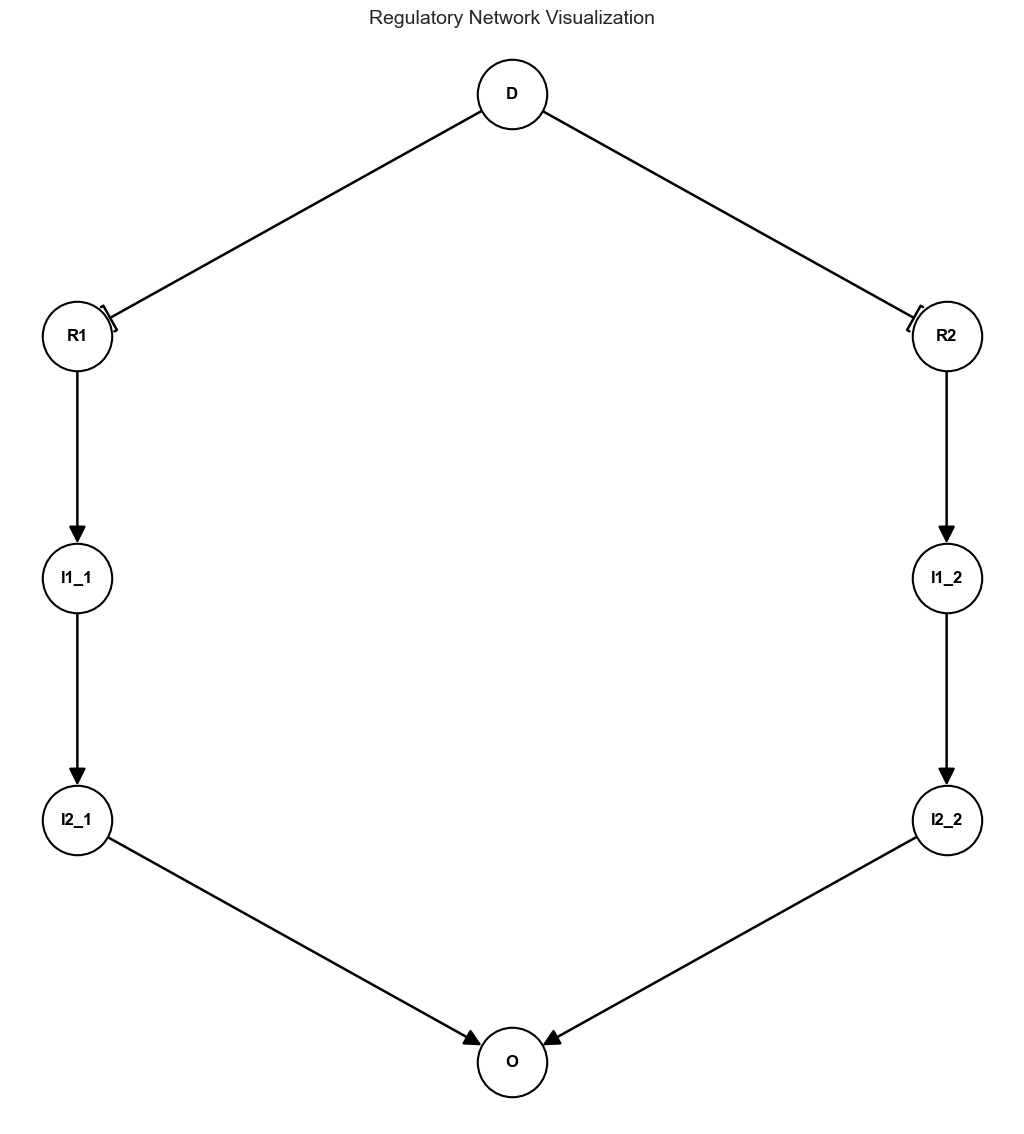

In [27]:
from visual.network_topology import visualise_network_2, create_layers

# num_intermediate_layers=2, num_cascades=3, drugs=['D']

layers = create_layers(n_layers, n_cascades, [drug_name])
regulations = new_spec.get_regulations()
feedback_regulations = new_spec.get_feedback_regulations()
figure = visualise_network_2(layers, regulations, feedback_regulations=feedback_regulations)
save_figure(notebook_config, figure, "network_topology", "png", verbose=1, dpi=300)

In [28]:
from SALib.sample import morris as morris_sample
from SALib.analyze import morris as morris_analyze
import numpy as np

# Define the problem for Morris method
species = builder.get_state_variables()  # assuming builder has a method to get species names
param_names = [s for s in species if s != 'Oa']  # exclude target output
# only include 'a' species
param_names = [s for s in param_names if s.endswith('a')]

# print(specie_range)  # [200, 1000]
# bounds need to be exactly specie_range but duplicated for each parameter
bounds = [specie_range for _ in param_names]

problem = {
    'num_vars': len(param_names),
    'names': param_names,
    'bounds': bounds
}

# Generate samples
param_values = morris_sample.sample(problem, N=100, num_levels=4, optimal_trajectories=None, seed=seed)

# Run model for each sample
def run_model(params):
    # Set species initial conditions
    solver.set_state_values(dict(zip(param_names, params)))
    sim = solver.simulate(sim_start, sim_stop, sim_step)
    # Extract Oa at final time point
    return sim['Oa'].iloc[-1]

Y = np.array([run_model(params) for params in param_values])

# Morris analysis
Si = morris_analyze.analyze(problem, param_values, Y, conf_level=0.95, print_to_console=True)


              mu    mu_star      sigma  mu_star_conf
R1a     5.694160   5.694160   4.889001      0.876737
R2a     0.400607   0.400607   0.829351      0.190185
I1_1a   5.878828   5.878828   4.149292      0.776631
I1_2a   0.829259   0.829259   1.894481      0.322888
I2_1a  27.026150  27.026150  12.411893      2.572909
I2_2a   0.488852   0.488852   0.945456      0.186581


In [29]:
save_data(notebook_config, Si, "morris_analysis", "pkl", verbose=1)

Figure saved at I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\model-inspection\figures\testCaseD_morris_sensitivity_analysis.png


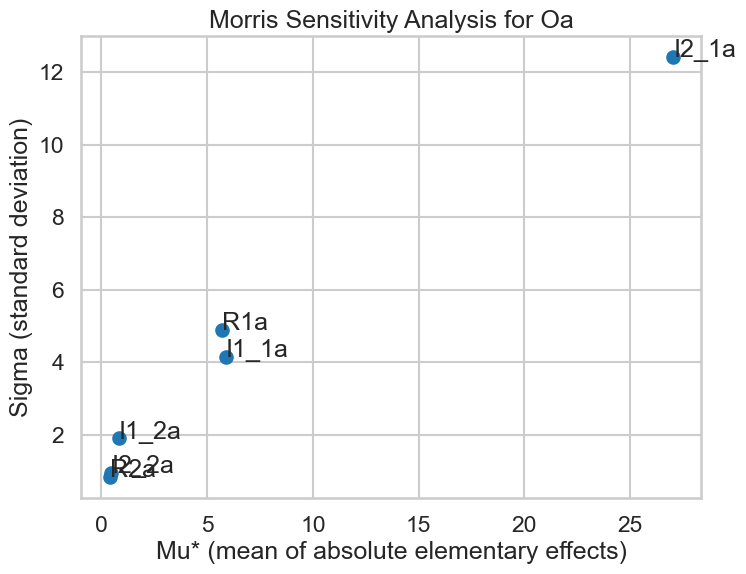

In [30]:

# Display results
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_style('whitegrid')
# set font to arial 
plt.rcParams['font.family'] = 'Arial'



mu_star = Si['mu_star']
sigma = Si['sigma']

plt.figure(figsize=(8, 6))
plt.scatter(mu_star, sigma)
for i, name in enumerate(param_names):
    plt.text(mu_star[i], sigma[i], name)
plt.xlabel('Mu* (mean of absolute elementary effects)')
plt.ylabel('Sigma (standard deviation)')
plt.title('Morris Sensitivity Analysis for Oa')
plt.grid(True)

save_figure(notebook_config, plt.gcf(), "morris_sensitivity_analysis", "png", verbose=1, dpi=300)
plt.show()